In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [7]:
df_train = pd.read_csv("sample_data/train_MOFs.csv")
df_dev = pd.read_csv("sample_data/val_MOFs.csv")
df_test = pd.read_csv("sample_data/test_MOFs.csv")

print(df_train.shape)
print(df_dev.shape)
print(df_test.shape)

(259540, 9)
(32442, 9)
(32444, 9)


In [8]:
X_train = df_train.copy()
y_train = X_train.pop('CO2_uptake_P0.15bar_T298K [mmol/g]')

X_dev = df_dev.copy()
y_dev = X_dev.pop('CO2_uptake_P0.15bar_T298K [mmol/g]')

X_test = df_test.copy()
y_test = X_test.pop('CO2_uptake_P0.15bar_T298K [mmol/g]')

### LINEAR REGRESSION

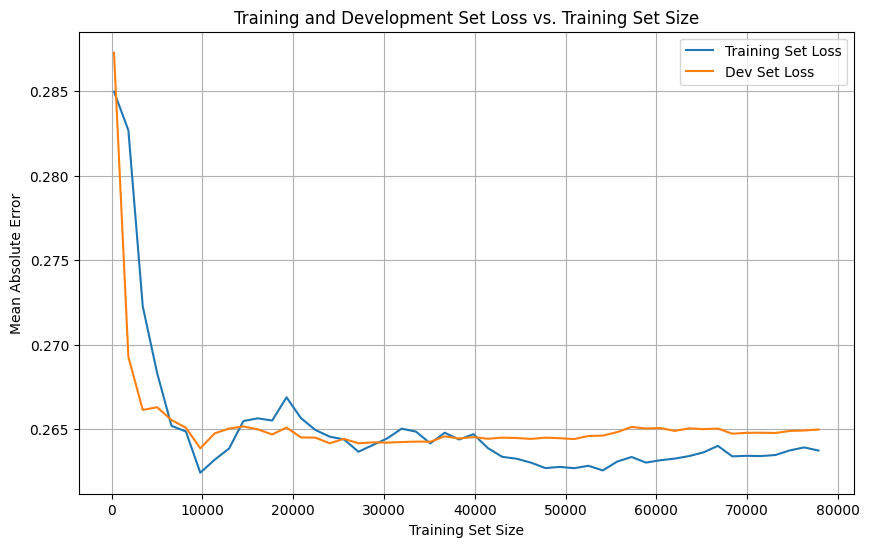

In [9]:

# Initialize lists to store the error values for different training set sizes
train_errors = []
dev_errors = []
train_sizes = np.linspace(0.001, 0.3, 50)

# Train the model on different sizes of the training set
for train_size in train_sizes:
    # Sample a fraction of the training data
    X_train_subset = X_train.sample(frac=train_size, random_state=42)
    y_train_subset = y_train.loc[X_train_subset.index]

    # Initialize and train the model
    model_lr = LinearRegression()
    model_lr.fit(X_train_subset, y_train_subset)

    # Calculate training and development errors
    y_train_pred = model_lr.predict(X_train_subset)
    y_dev_pred = model_lr.predict(X_dev)

    train_errors.append(mean_absolute_error(y_train_subset, y_train_pred))
    dev_errors.append(mean_absolute_error(y_dev, y_dev_pred))
    #print(f"Train size: {train_size * len(X_train):.0f} samples")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(np.array(train_sizes) * len(X_train), train_errors, label="Training Set Loss")
plt.plot(np.array(train_sizes) * len(X_train), dev_errors, label="Dev Set Loss")
plt.xlabel("Training Set Size")
plt.ylabel("Mean Absolute Error")
plt.title("Training and Development Set Loss vs. Training Set Size")
plt.legend()
plt.grid()
plt.show()


In [10]:
y_test_pred_lr = model_lr.predict(X_test)
mae_lr = mean_absolute_error(y_test, y_test_pred_lr)
print(mae_lr)

0.26302476224386995


### GRADIENT BOOST

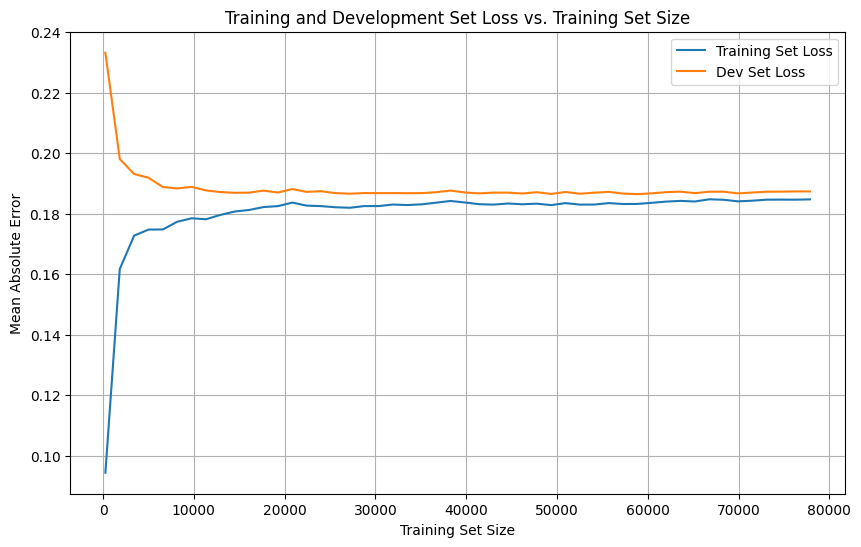

In [11]:

# Initialize lists to store the error values for different training set sizes
train_errors = []
dev_errors = []
train_sizes = np.linspace(0.001, 0.3, 50)

# Train the model on different sizes of the training set
for train_size in train_sizes:
    # Sample a fraction of the training data
    X_train_subset = X_train.sample(frac=train_size, random_state=42)
    y_train_subset = y_train.loc[X_train_subset.index]

    # Initialize and train the model
    model = GradientBoostingRegressor(random_state=42)
    model.fit(X_train_subset, y_train_subset)

    # Calculate training and development errors
    y_train_pred = model.predict(X_train_subset)
    y_dev_pred = model.predict(X_dev)

    train_errors.append(mean_absolute_error(y_train_subset, y_train_pred))
    dev_errors.append(mean_absolute_error(y_dev, y_dev_pred))
    #print(f"Train size: {train_size * len(X_train):.0f} samples")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(np.array(train_sizes) * len(X_train), train_errors, label="Training Set Loss")
plt.plot(np.array(train_sizes) * len(X_train), dev_errors, label="Dev Set Loss")
plt.xlabel("Training Set Size")
plt.ylabel("Mean Absolute Error")
plt.title("Training and Development Set Loss vs. Training Set Size")
plt.legend()
plt.grid()
plt.show()


In [12]:
y_test_pred_gb = model.predict(X_test)
mae_gb = mean_absolute_error(y_test, y_test_pred_gb)
print(mae_gb)

0.1866652463136224


### RANDOM FOREST

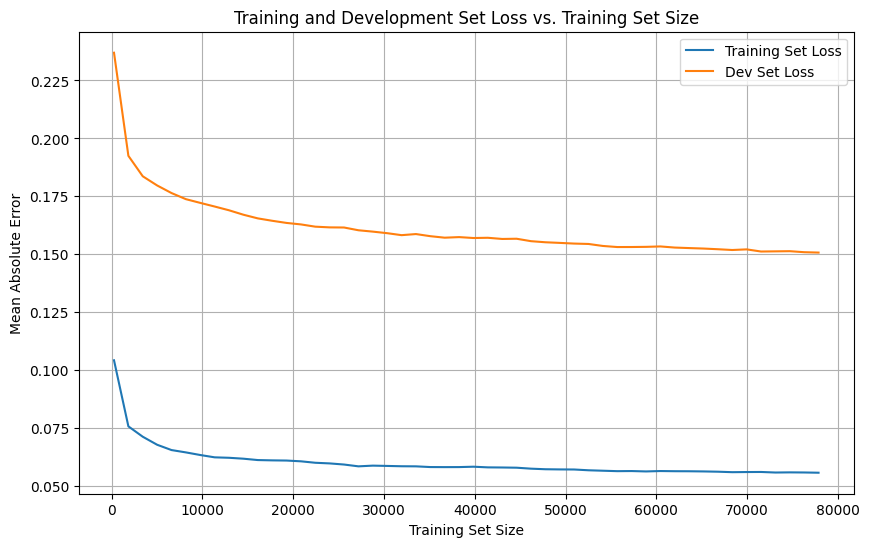

In [13]:

# Initialize lists to store the error values for different training set sizes
train_errors = []
dev_errors = []
train_sizes = np.linspace(0.001, 0.3, 50)

# Train the model on different sizes of the training set
for train_size in train_sizes:
    # Sample a fraction of the training data
    X_train_subset = X_train.sample(frac=train_size, random_state=42)
    y_train_subset = y_train.loc[X_train_subset.index]

    # Initialize and train the model
    model_rf = RandomForestRegressor(random_state=42)
    model_rf.fit(X_train_subset, y_train_subset)

    # Calculate training and development errors
    y_train_pred = model_rf.predict(X_train_subset)
    y_dev_pred = model_rf.predict(X_dev)

    train_errors.append(mean_absolute_error(y_train_subset, y_train_pred))
    dev_errors.append(mean_absolute_error(y_dev, y_dev_pred))
    #print(f"Train size: {train_size * len(X_train):.0f} samples")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(np.array(train_sizes) * len(X_train), train_errors, label="Training Set Loss")
plt.plot(np.array(train_sizes) * len(X_train), dev_errors, label="Dev Set Loss")
plt.xlabel("Training Set Size")
plt.ylabel("Mean Absolute Error")
plt.title("Training and Development Set Loss vs. Training Set Size")
plt.legend()
plt.grid()
plt.show()

In [14]:
y_test_pred_rf = model_rf.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_test_pred_rf)
print(mae_rf)

0.14891570722551603


In [15]:
print('MAE for LinearRegression on test set', mae_lr)
print('MAE for GradientBoostRegressor on test set', mae_gb)
print('MAE for RandomForestRegressor on test set', mae_rf)

MAE for LinearRegression on test set 0.26302476224386995
MAE for GradientBoostRegressor on test set 0.1866652463136224
MAE for RandomForestRegressor on test set 0.14891570722551603


###LINEAR REGRESSION ON FULL DATASET

In [16]:
model_full_lr = LinearRegression()
model_full_lr.fit(X_train, y_train) # Train on all data, 300k rows

model_pred_train_lr = model_full_lr.predict(X_train)
model_pred_dev_lr = model_full_lr.predict(X_dev)
model_pred_test_lr = model_full_lr.predict(X_test)

print(f"train_error: {mean_absolute_error(y_train, model_pred_train_lr)}")
print(f"dev_error: {mean_absolute_error(y_dev, model_pred_dev_lr)}")
print(f"test_error: {mean_absolute_error(y_test, model_pred_test_lr)}")

train_error: 0.264679662446495
dev_error: 0.26526655275646255
test_error: 0.26331405462543045


In [30]:
joblib.dump(model_full_lr, 'model_full_lr.pkl')

['model_full_lr.pkl']

### RANDOMIZED SEARCH

Random Forest

In [17]:
random_grid_rf = {'bootstrap': [True, False],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
               'max_features': [None, 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [50, 100, 200]}

In [18]:
X_train_subset = X_train.sample(frac=0.01, random_state=42)
y_train_subset = y_train.loc[X_train_subset.index]
print(X_train_subset.shape)
print(y_train_subset.shape)

(2595, 8)
(2595,)


In [19]:
rf = RandomForestRegressor(random_state=42)

rf_random = RandomizedSearchCV(estimator = rf,
                               param_distributions = random_grid_rf,
                               n_iter = 10,
                               cv = 5,
                               verbose=2,
                               scoring = "neg_mean_absolute_error",
                               random_state=42)
# Fit the random search model
rf_random.fit(X_train_subset, y_train_subset)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   1.2s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': [None, 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42, scoring='neg_mean_absolute_error',
                   verbose=2)

In [20]:
print(rf_random.best_params_)

{'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 30, 'bootstrap': True}


In [21]:
model_full = RandomForestRegressor(n_estimators=100,
                                   min_samples_split=5,
                                   min_samples_leaf=2,
                                   max_features=None,
                                   max_depth=30,
                                   bootstrap=True)
model_full.fit(X_train, y_train) # Train on all data, 300k rows

RandomForestRegressor(max_depth=30, max_features=None, min_samples_leaf=2,
                      min_samples_split=5)

In [22]:
train_pred_full = model_full.predict(X_train)
dev_pred_full = model_full.predict(X_dev)
test_pred_full = model_full.predict(X_test)
print(f"train_error: {mean_absolute_error(y_train, train_pred_full)}")
print(f"dev_error  : {mean_absolute_error(y_dev, dev_pred_full)}")
print(f"test_error : {mean_absolute_error(y_test, test_pred_full)}")

train_error: 0.06600575908837032
dev_error  : 0.1387954905193344
test_error : 0.1364178573942066


In [31]:
joblib.dump(model_full, 'model_full_rf.pkl')

['model_full_rf.pkl']

###GRADIENT BOOST

In [23]:
# Define the grid of hyperparameters to search
hyperparameter_grid_gb = {'loss': ['squared_error', 'absolute_error', 'huber', 'quantile'],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3, 0.5],
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 3, 5, 10, 50, None],
    'min_samples_leaf': [1, 2, 4] ,
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2', None]}

In [24]:
gbr = GradientBoostingRegressor()

# Set up the random search with 4-fold cross validation
gb_random = RandomizedSearchCV(estimator=gbr,
            param_distributions=hyperparameter_grid_gb,
            cv=5,
            n_iter=10,
            verbose = 2,
            random_state=42)

gb_random.fit(X_train_subset,y_train_subset)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END learning_rate=0.2, loss=huber, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=  22.7s
[CV] END learning_rate=0.2, loss=huber, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=  21.0s
[CV] END learning_rate=0.2, loss=huber, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=  22.4s
[CV] END learning_rate=0.2, loss=huber, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=  21.6s
[CV] END learning_rate=0.2, loss=huber, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=  21.3s
[CV] END learning_rate=0.01, loss=absolute_error, max_depth=50, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=  15.8s
[CV] END

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(),
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.2,
                                                          0.3, 0.5],
                                        'loss': ['squared_error',
                                                 'absolute_error', 'huber',
                                                 'quantile'],
                                        'max_depth': [2, 3, 5, 10, 50, None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42, verbose=2)

In [25]:
print(gb_random.best_params_)

{'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 50, 'loss': 'huber', 'learning_rate': 0.1}


In [26]:
full_gbr = GradientBoostingRegressor(n_estimators = 100, min_samples_split= 10, min_samples_leaf= 1, max_features= 'sqrt', max_depth= 50, loss= 'huber', learning_rate= 0.1)
full_gbr.fit(X_train, y_train)

GradientBoostingRegressor(loss='huber', max_depth=50, max_features='sqrt',
                          min_samples_split=10)

In [27]:
train_pred_full_gb = full_gbr.predict(X_train)
dev_pred_full_gb = full_gbr.predict(X_dev)
test_pred_full_gb = full_gbr.predict(X_test)
print(f"train_error: {mean_absolute_error(y_train, train_pred_full_gb)}")
print(f"dev_error  : {mean_absolute_error(y_dev, dev_pred_full_gb)}")
print(f"test_error : {mean_absolute_error(y_test, test_pred_full_gb)}")

train_error: 0.003901283923774429
dev_error  : 0.14041339465973976
test_error : 0.13924092967105706


In [32]:
joblib.dump(full_gbr, 'model_full_gb.pkl')

['model_full_gb.pkl']